In [ ]:
# Pm 10 Image Classification

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [2]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
download = drive.CreateFile({'id': '1WZJ-LmeA2G2MQkD-YL_a_u8FYgaNjdoc'})

In [5]:
download.GetContentFile('Dataset.zip')
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: For Model v1.0/
   creating: For Model v1.0/Dataset/
 extracting: For Model v1.0/Dataset/Dangerous190.jpg  
 extracting: For Model v1.0/Dataset/Dangerous191.jpg  
 extracting: For Model v1.0/Dataset/Dangerous192.jpg  
 extracting: For Model v1.0/Dataset/Dangerous193.jpg  
 extracting: For Model v1.0/Dataset/Dangerous194.jpg  
 extracting: For Model v1.0/Dataset/Dangerous195.jpg  
 extracting: For Model v1.0/Dataset/Dangerous196.jpg  
 extracting: For Model v1.0/Dataset/Dangerous197.jpg  
 extracting: For Model v1.0/Dataset/Dangerous198.jpg  
 extracting: For Model v1.0/Dataset/Dangerous199.jpg  
 extracting: For Model v1.0/Dataset/Dangerous200.jpg  
  inflating: For Model v1.0/Dataset/Dangerous372.jpg  
  inflating: For Model v1.0/Dataset/Dangerous373.jpg  
  inflating: For Model v1.0/Dataset/Dangerous374.jpg  
  inflating: For Model v1.0/Dataset/Dangerous375.jpg  
  inflating: For Model v1.0/Dataset/Dangerous379.jpg  
  inflating: For Model v1.0/Data

In [6]:
# Read CSV File
train = pd.read_csv('/content/For Model v1.0/pm10.csv')    
train.head()     

,Image,16,17,21,22,23,25,26,27,28,...,131,138,145,148,190,193,209,213,219,278
0,Good215,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Good216,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Good217,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Good241,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Good242,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.columns

Index(['Image', '16', '17', '21', '22', '23', '25', '26', '27', '28', '29',
       '31', '32', '33', '37', '38', '39', '41', '44', '45', '46', '47', '49',
       '50', '51', '52', '53', '55', '56', '57', '58', '59', '60', '61', '64',
       '65', '66', '67', '69', '72', '73', '74', '76', '78', '79', '80', '84',
       '87', '88', '90', '93', '95', '97', '98', '101', '103', '104', '106',
       '107', '108', '109', '111', '113', '114', '120', '124', '128', '129',
       '131', '138', '145', '148', '190', '193', '209', '213', '219', '278'],
      dtype='object')

In [8]:
# Convert to array
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/For Model v1.0/Dataset/'+train['Image'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 594/594 [00:08<00:00, 69.02it/s]


In [9]:
X.shape

(594, 400, 400, 3)

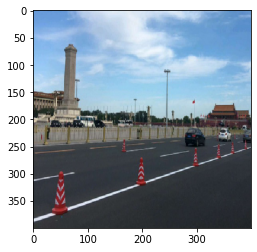

In [10]:
# Checking image dimension
plt.imshow(X[20])

In [11]:
# Dropping Image column
y = np.array(train.drop(['Image'],axis=1))
y.shape

(594, 77)

In [12]:
# Split train size for 90% and validation set for 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [13]:
# Model Architecture
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(77, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 64)       0

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/20
9/9 [==============================] - 81s 8s/step - loss: 5.0804 - accuracy: 0.0187 - val_loss: 4.4446 - val_accuracy: 0.0333
Epoch 2/20
9/9 [==============================] - 78s 8s/step - loss: 4.3200 - accuracy: 0.0337 - val_loss: 4.3444 - val_accuracy: 0.0167
Epoch 3/20
9/9 [==============================] - 77s 9s/step - loss: 4.2811 - accuracy: 0.0337 - val_loss: 4.6421 - val_accuracy: 0.0167
Epoch 4/20
9/9 [==============================] - 72s 8s/step - loss: 4.2716 - accuracy: 0.0337 - val_loss: 4.2867 - val_accuracy: 0.1167
Epoch 5/20
9/9 [==============================] - 72s 8s/step - loss: 4.2070 - accuracy: 0.0487 - val_loss: 4.3068 - val_accuracy: 0.0000e+00
Epoch 6/20
9/9 [==============================] - 71s 8s/step - loss: 4.1072 - accuracy: 0.0637 - val_loss: 4.3476 - val_accuracy: 0.0000e+00
Epoch 7/20
9/9 [==============================] - 73s 8s/step - loss: 3.9911 - accuracy: 0.0768 - val_loss: 4.3203 - val_accuracy: 0.0500
Epoch 8/20
9/9 [==========

In [34]:
# Testing Image

img = image.load_img('/content/4.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Top 3 Predicted Pm10:
38 (1.0)
61 (1.0)
33 (0.998)


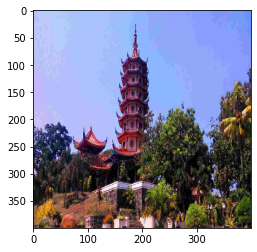

In [37]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
print("Top 3 Predicted Pm10:")
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)